# Forecasting procedure

In [1]:
#import the libraries and read the dataset
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
#check the last few rows
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [3]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Train Test Split

In [4]:
train_data = df.iloc[:109] # Goes up to but not including 109
test_data = df.iloc[108:]

# Fitting the Model

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


# Evaluating Model against Test Set

In [6]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [7]:
test_predictions

1958-02-01    339.146252
1958-03-01    399.284474
1958-04-01    394.235196
1958-05-01    402.545303
1958-06-01    473.128007
1958-07-01    521.796520
1958-08-01    514.516182
1958-09-01    446.221344
1958-10-01    385.435189
1958-11-01    339.648129
1958-12-01    381.458569
1959-01-01    401.212425
1959-02-01    387.161260
1959-03-01    455.813618
1959-04-01    450.049483
1959-05-01    459.536102
1959-06-01    540.111631
1959-07-01    595.670443
1959-08-01    587.359382
1959-09-01    509.395627
1959-10-01    440.003604
1959-11-01    387.734191
1959-12-01    435.463990
1960-01-01    458.014521
1960-02-01    441.974046
1960-03-01    520.345937
1960-04-01    513.765738
1960-05-01    524.595436
1960-06-01    616.578535
1960-07-01    680.003148
1960-08-01    670.515440
1960-09-01    581.513880
1960-10-01    502.297604
1960-11-01    442.628090
1960-12-01    497.115288
1961-01-01    522.858436
Freq: MS, Name: HW Forecast, dtype: float64

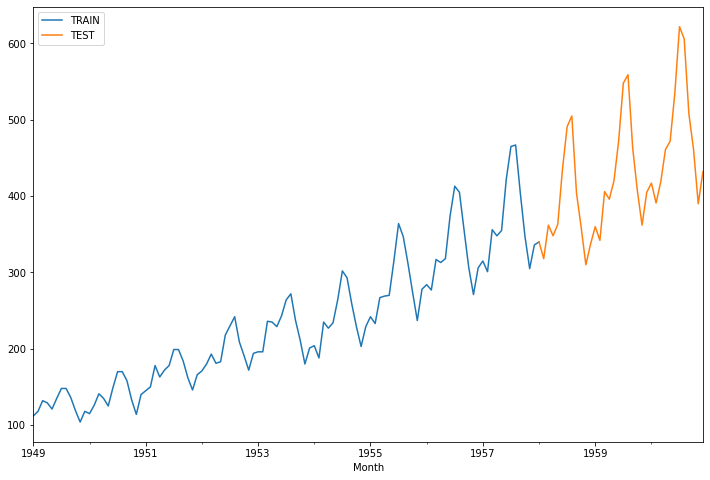

In [8]:
#plot the test and train
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

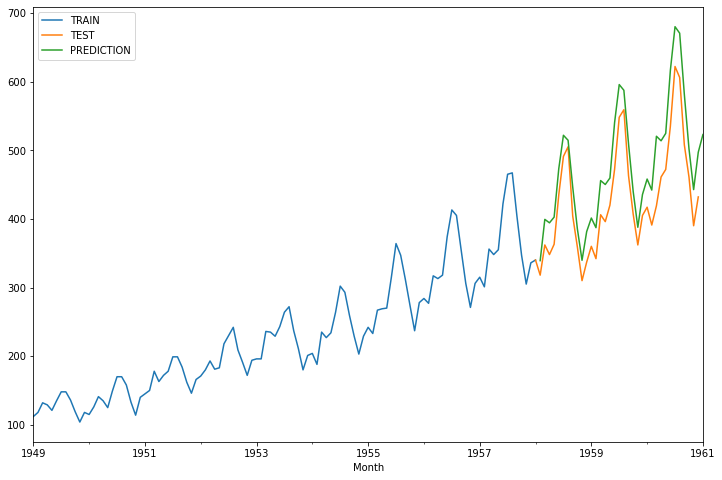

In [9]:
#plot all test,train,and prediction
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')

# Evaluation Metrics

In [10]:
#import libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [11]:
mean_absolute_error(test_data,test_predictions)

63.030144414397256

In [12]:
mean_squared_error(test_data,test_predictions)

5614.103650709311

In [13]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92732245789456

In [14]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


# Forecasting for Future

In [15]:
#re-train the database with developed model on entire database
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [16]:
#do the prediction
forecast_predictions = final_model.forecast(36)

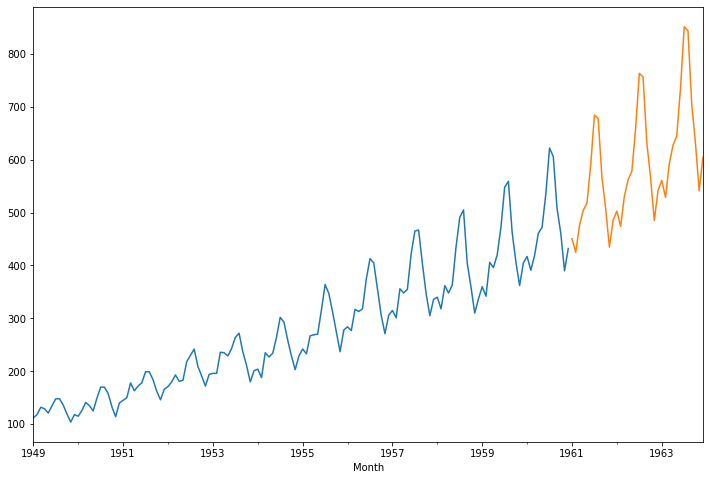

In [17]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

# How to check the data for stationarity

In [19]:
#read your dataset
df2 = pd.read_csv('samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


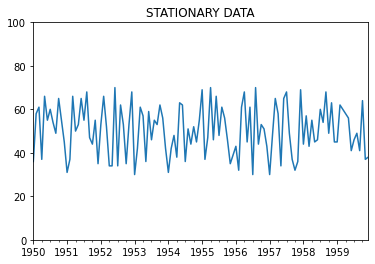

In [20]:
#plot the col a
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

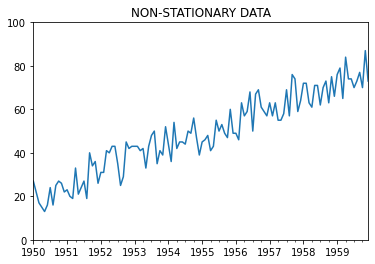

In [21]:
#plot the col b
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

# Differencing

In [22]:
#import the library
from statsmodels.tsa.statespace.tools import diff

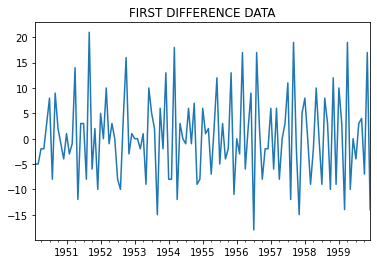

In [23]:
#use diffrencing method to convert col b and make it stationary
df2['d1'] = diff(df2['b'],k_diff=1)

df2['d1'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True);